<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_15_Matplotlib Scatter Plots.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


## 🟨 Median Yearly Salary vs. Job Count (2.15.1)

In [14]:
df_salary = df[df['job_country'] == "Poland"]
#df_salary = df

In [20]:
df_salary = df[df['job_country'] == "Poland"].groupby('job_title_short').agg(
    median_salary = ("salary_year_avg", 'median'),
    job_count = ('job_title_short', 'size')
)

In [21]:
df_salary

,median_salary,job_count
job_title_short,,
Business Analyst,87050.0,1204
Cloud Engineer,84150.0,393
Data Analyst,89100.0,3172
Data Engineer,133500.0,3540
Data Scientist,131867.0,1713
Machine Learning Engineer,89100.0,468
Senior Data Analyst,111175.0,609
Senior Data Engineer,89100.0,1275
Senior Data Scientist,157500.0,531


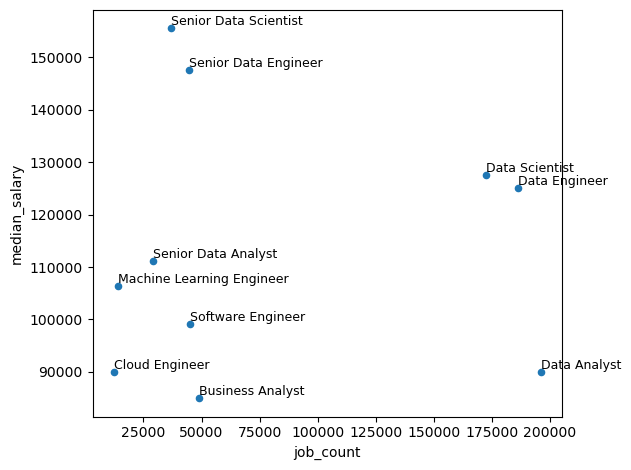

In [8]:
ax = df_salary.plot(kind='scatter', x='job_count', y='median_salary')

for i, row in df_salary.iterrows():
    ax.text(
        row['job_count'],               # x-coordinate
        row['median_salary'],           # y-coordinate
        i,                              # label text (job title)
        fontsize=9,
        ha='left',
        va='bottom'
    )

plt.tight_layout()
plt.show()


---

## 🟨 Top 7 Countries by Median Yearly Salary vs Job Count  (2.15.2)

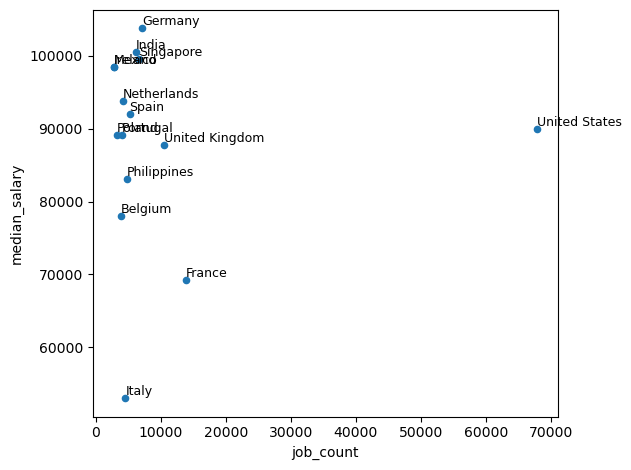

In [77]:
df_salary = df[df['job_title_short'] == "Data Analyst"].copy()
#df_salary = df

df_salary = df_salary.groupby('job_country').agg(
    median_salary = ("salary_year_avg", 'median'),
    job_count = ('job_title_short', 'size')
).sort_values(by='job_count', ascending=False).head(15)

ax = df_salary.plot(kind='scatter', x='job_count', y='median_salary')

for i, row in df_salary.iterrows():
    ax.text(
        row['job_count'],               # x-coordinate
        row['median_salary'],           # y-coordinate
        i,                              # label text (job title)
        fontsize=9,
        ha='left',
        va='bottom'
    )

plt.tight_layout()
plt.show()


In [76]:
id(df_salary)

2253009176656

---

## 🟥 Average Yearly Salary vs. Job Count for Top Roles by Schedule Type (2.15.3)

In [ ]:
# Code Needed
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

---